<a href="https://colab.research.google.com/github/bety26/sss/blob/main/ses_d1_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import soundfile
soundfile.info('artifact__201105040918.wav')

artifact__201105040918.wav
samplerate: 44100 Hz
channels: 1
duration: 9.000 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]

In [ ]:
import librosa
import librosa.display

signal,sampling_rate=librosa.load('artifact__201105040918.wav',sr=None)

In [ ]:
import sys
import numpy as np
np.set_printoptions(threshold=np.inf)
print(signal.shape)

(396900,)


In [ ]:
print(sampling_rate)

44100


örneklem sayısını sampling rate e bölünürse toplam süre bulunur

In [ ]:
print(396900/sampling_rate)

9.0


<Figure size 640x480 with 0 Axes>

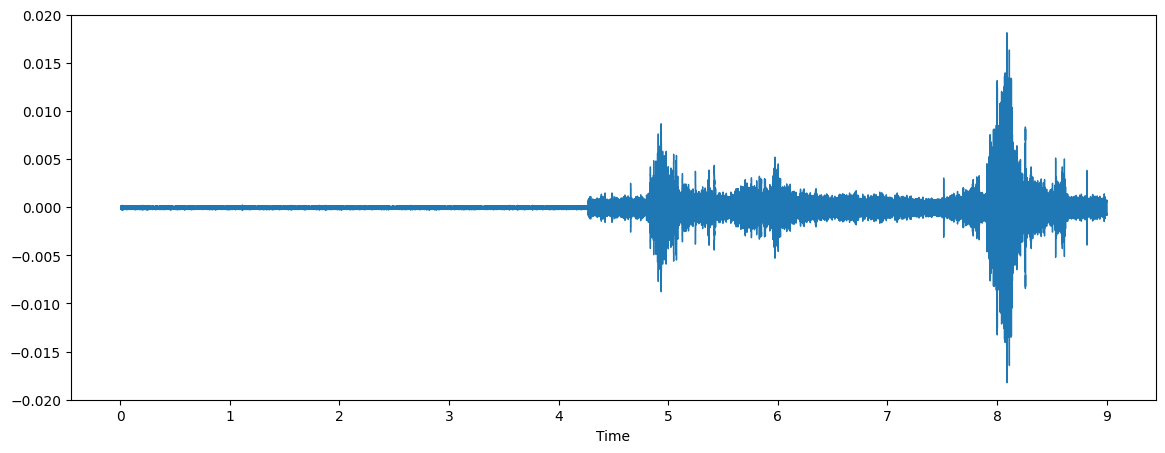

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(14,5))
librosa.display.waveshow(y=signal,sr=sampling_rate)


# spectrogram


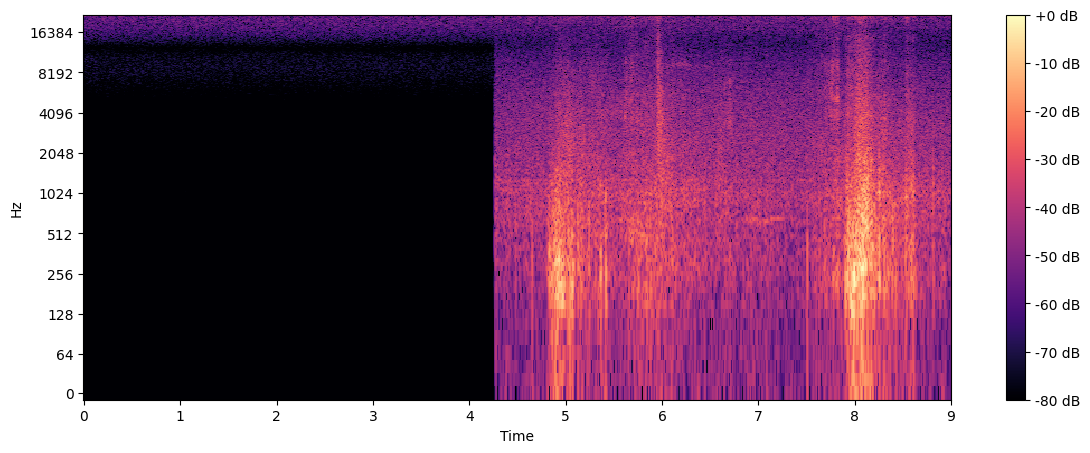

In [ ]:
from librosa.core.spectrum import amplitude_to_db
spec = np.abs(librosa.stft(signal))
spec=librosa.amplitude_to_db(spec,ref=np.max)

plt.figure(figsize=(14,5))
librosa.display.specshow(spec,sr=sampling_rate,x_axis='time',y_axis='log');
plt.colorbar(format='%+2.0f dB');

# mel-spectrogram
sesin eşit uzaklıklarda duyabileceğimiz bir ses perde birimi

düşük frekanstaki sesler için

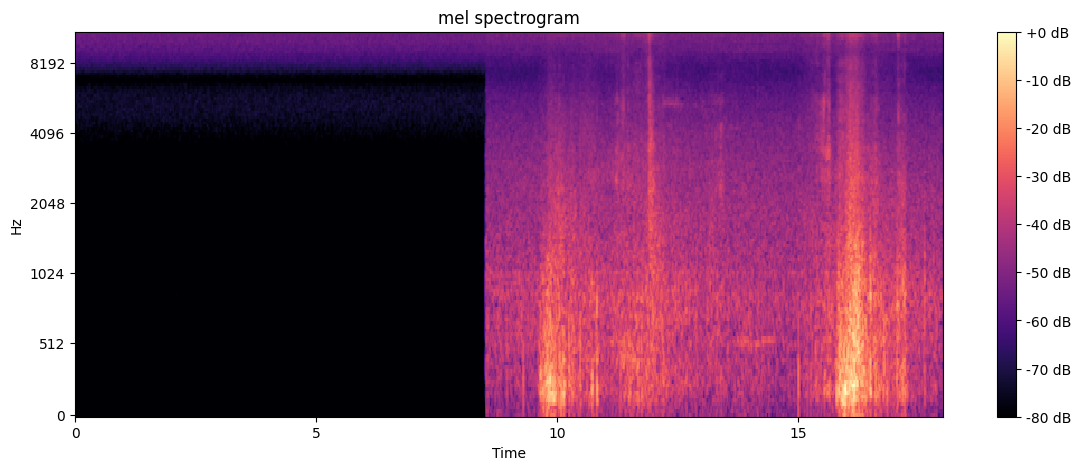

In [ ]:

mel_spect=librosa.feature.melspectrogram(y=signal,sr=sampling_rate)
mel_spect=librosa.power_to_db(mel_spect,ref=np.max)

plt.figure(figsize=(14,5))
librosa.display.specshow(mel_spect,y_axis='mel',x_axis='time');
plt.title('mel spectrogram');
plt.colorbar(format='%+2.0f dB');

# Chromagram 

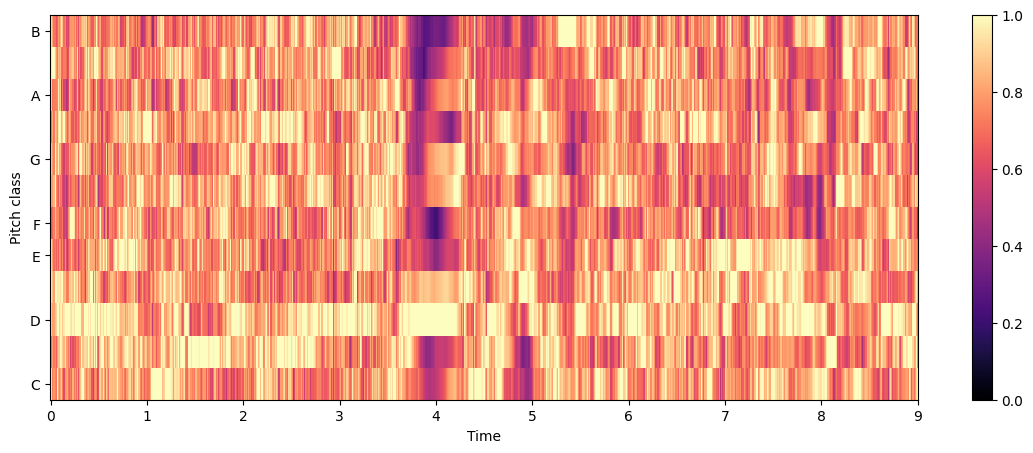

In [ ]:
C=librosa.feature.chroma_cqt(y=signal,sr=sampling_rate,bins_per_octave=36)

plt.figure(figsize=(14,5))
librosa.display.specshow(C,sr=sampling_rate,x_axis='time',y_axis='chroma',vmin=0,vmax=1);
plt.colorbar()

#mel-frequency cepstral coefficients (MFCCs)

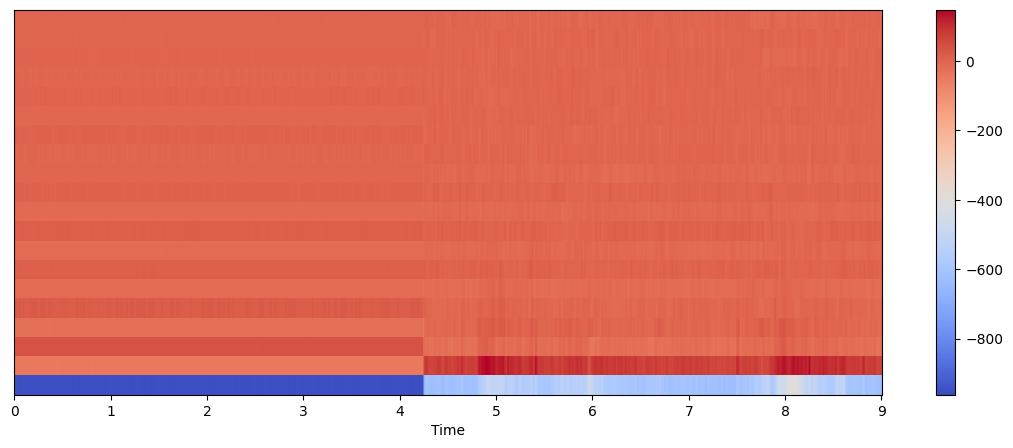

In [ ]:
mfccs=librosa.feature.mfcc(y=signal, sr=sampling_rate)

plt.figure(figsize=(14,5))
librosa.display.specshow(mfccs,sr=sampling_rate,x_axis='time')
plt.colorbar()